## Weighted Averages
In statistics, a moving average/rolling average/running average is a calculation to analyze data points by creating a series of averages of different subsets of the full data set.  
It is also called a moving mean (MM) or rolling mean and is a type of 'finite impulse response filter' (Signal processing). Variations include: simple, and cumulative, or weighted forms.

Given a series of numbers and a fixed subset size, the first element of the moving average is obtained by taking the average of the initial fixed subset of the number series. Then the subset is modified by "shifting forward"; that is, excluding the first number of the series and including the next value in the subset.

In this notebook, we shall explore the different variations of moving averages and apply them on a noisy dummy dataset.

In [196]:
"""Importing the required libraries"""
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [197]:
"""Function to plot the curve 'averaged' by the different methods"""
def plot_avg_curve(method, x, y):
    if method['name'] == 'SMA':
        y_sma = SMA(method['N_SUBSET'], y)
        plt.plot(x, y, linewidth=0.2)
        plt.plot(x, y_sma)
        plt.xlabel('Time')
        plt.ylabel('y')
        plt.title('Single Moving Average | Window Size: {}'.format(method['N_SUBSET']))
        plt.show()
    elif method['name'] == 'CMA':
        y_cma = CMA(y)
        plt.plot(x, y, linewidth=0.2)
        plt.plot(x, y_cma)
        plt.xlabel('Time')
        plt.ylabel('y')
        plt.title('Cumulative Moving Average')
        plt.show()
    elif method['name'] == 'WMA':
        y_wma = WMA(y)
        plt.plot(x, y, linewidth=0.2)
        plt.plot(x, y_wma)
        plt.xlabel('Time')
        plt.ylabel('y')
        plt.title('Weighted Moving Average')
        plt.show()
    elif method['name'] == 'EWMA':
        y_ewma = EWMA(y, method['alpha'])
        plt.plot(x, y, linewidth=0.2)
        plt.plot(x, y_ewma)
        plt.xlabel('Time')
        plt.ylabel('y')
        plt.title('Exponentially Weighted Moving Average | {}'.format(method['alpha']))
        plt.show()

We'll use this helper function later.

### Loading the Dataset

In [198]:
"""Loading the dummy data"""
df = pd.read_excel('AirQualityUCI.xlsx')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


The data times increase linearly, we can replace them by index values.

In [199]:
"""Dummy 2D Data"""
# Acts as a measure of 'time'
x = np.linspace(0, len(df), len(df))
# This particular column provides us with nice noisy data.
y = df['PT08.S3(NOx)'].to_numpy()

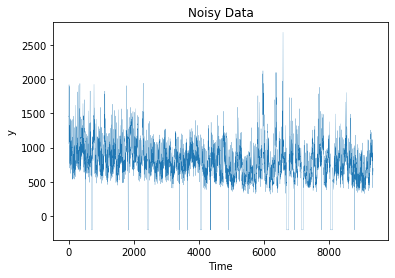

In [200]:
"""Plotting the dummy data"""
plt.plot(x, y, linewidth=0.2)
plt.xlabel('Time')
plt.ylabel('y')
plt.title('Noisy Data')
plt.show()

### Simple Moving Average (SMA)
Simple moving average (SMA) is the unweighted mean of the previous $N$ data. Where $N$ is also called the window size, and is the size of the subset we are averaging over.  
The following code will make this concrete.

In [201]:
"""The Simple Moving Averages (SMA) Algorithm"""
def SMA(N_SUBSET, y):
    N_DATA = y.shape[0]
    y_sma = np.empty(y.shape)
    y_sma[:] = np.nan # As we don't want the initial part to be plotted.
    for i in range(0, N_DATA - N_SUBSET + 1):
        y_sma[i+N_SUBSET-1] = np.mean(y[i:(i+N_SUBSET)])
    return y_sma

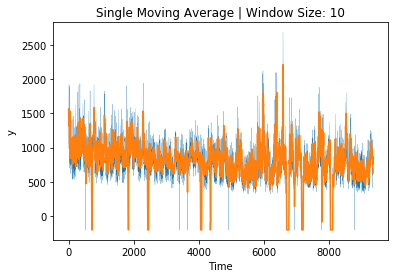

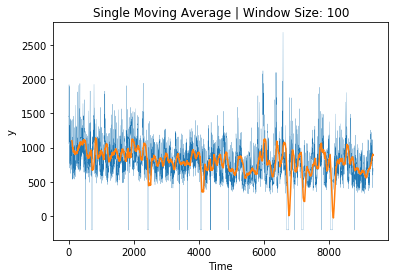

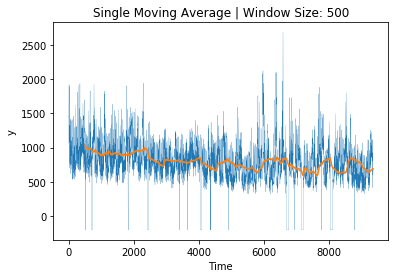

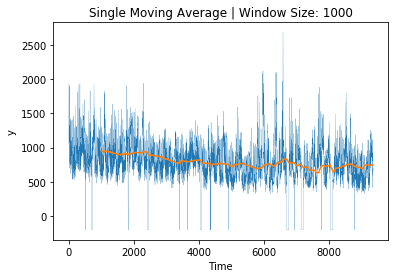

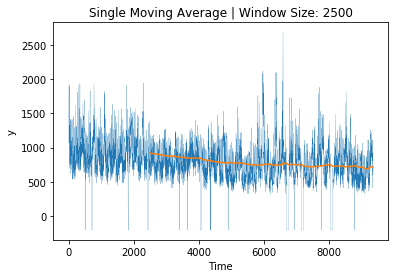

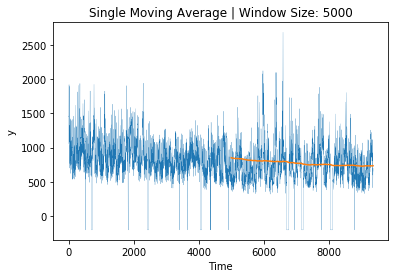

In [202]:
"""Analysing the effects of window sizes on the SMA curve computed"""
window_sizes = [10, 100, 500, 1000, 2500, 5000]
for window_size in window_sizes:
    SMA_params = {'name':'SMA', 'N_SUBSET':window_size}
    plot_avg_curve(SMA_params, x, y)

A window size of 500-1000 seems to fit the data nicely.

### Cumulative Moving Average (CMA)
As the name suggests, we take the average over all the data points available before the current datapoint. 

In [203]:
"""Algorithm for the Cumulative Moving Average"""
def CMA(y):
    y_cma = np.zeros(y.shape)
    y_cma[0] = y[0]
    for i in range(1, y.shape[0]):
        y_cma[i] = np.mean(y[:i])
    return y_cma

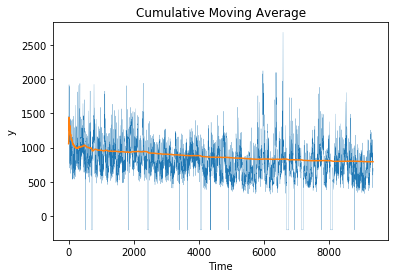

In [204]:
plot_avg_curve({'name':'CMA'}, x, y)

As you can see, CMA isn't a great way to analyse trends in the data.

### Weighted Moving Average (WMA)
A weighted average is an average that has multiplying factors to give different weights to data at different positions in the sample window. Mathematically, the weighted moving average is the convolution of the datum points with a fixed weighting function.  
In an n-day WMA the latest day has weight n, the second latest n − 1, etc., down to one.

In [205]:
"""Algorithm for the Weighted Moving Average"""
def WMA(y):
    weights = np.arange(1, y.shape[0], 1)
    y_wma = np.zeros(y.shape)
    y_wma[0] = y[0]
    for i in range(1, y.shape[0]):
        y_wma[i] = np.average(y[:i], weights = weights[:i])
    return y_wma

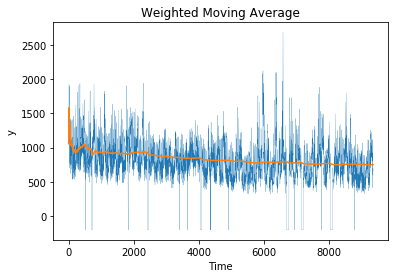

In [206]:
plot_avg_curve({'name':'WMA'}, x, y)

### Exponentially Weighted Moving Average (EWMA)
Now, we apply weighting factors which decrease exponentially. 
The weighting for each older data point decreases exponentially, never reaching zero.

In [207]:
"""Algorithm for the Exponentially Weighted Moving Average"""
def EWMA(y, alpha):
    s = np.zeros(y.shape)
    s[0] = y[0]
    for i in range(1, y.shape[0]):
        s[i] = alpha*y[i] + (1-alpha)*s[i-1]
    return s

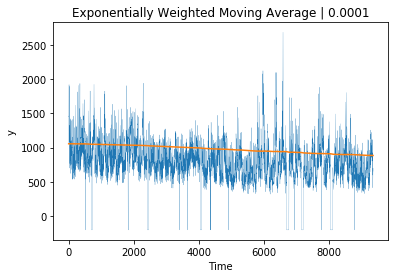

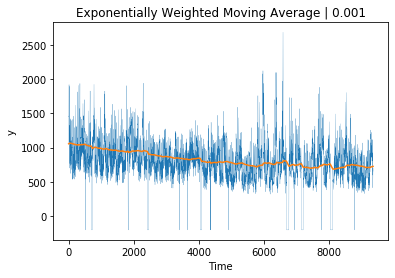

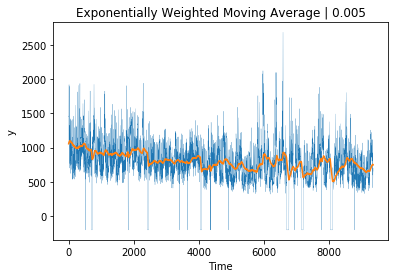

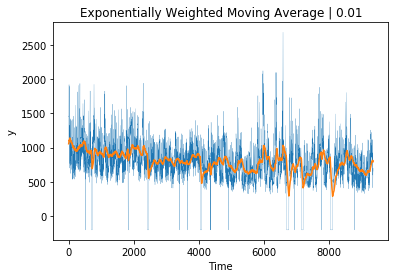

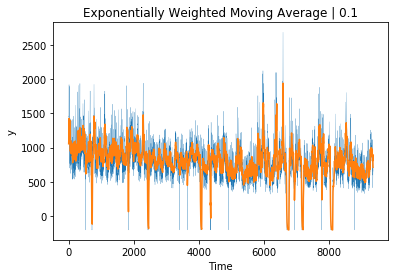

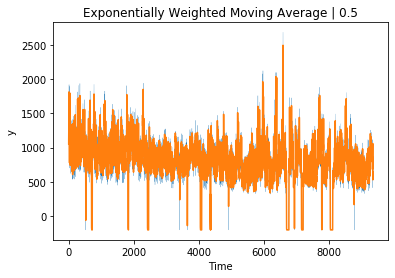

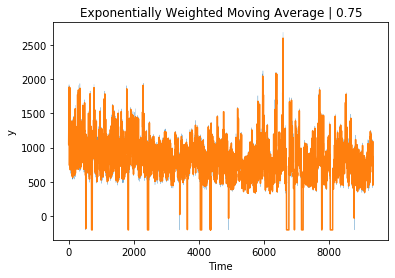

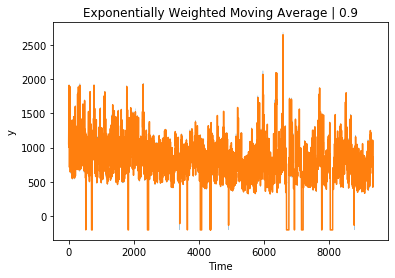

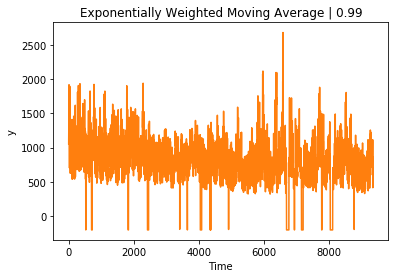

In [208]:
"""Analysing the effect of different values of alpha on the EWMA curve"""
alphas = [0.0001, 0.001, 0.005, 0.01, 0.1, 0.5, 0.75, 0.9, 0.99]
for alpha in alphas:
    plot_avg_curve({'name':'EWMA', 'alpha':alpha}, x, y)

As we can see, increasing `alpha` fits the dataset *almost* perfectly. 